## kMeans Clusters Exercises

These exercises should be saved as a pdf file, and then submitted to Moodle. To save as a pdf, use:
* File -> Download as -> PDF via Latex (if you have Latex on your computer).
* Print to PDF on your browser.

To make the notebooks easy to read, please follow these guidelines:
* Keep lines to less than 80 characters.
* Suppress unrequired output, e.g., by using semi-colons at the end of the last line of cells.

For these exercises we will use the penguins dataset from `seaborn`. After loading the dataset, remove any rows with missing values and create a numeric classification for `species`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import confusion_matrix
from logitplots import plt_confusion_matrix, plt_decision_boundaries
from scipy.stats import mode

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                how='any',inplace=True)
penguins['code'] = penguins.species.astype('category').cat.codes 
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2


### Exercise 1

Using all the numerical features, model the dataset using three clusters and 10 random initializations. You will need to normalize the data before passing it to `KMeans()`. (2 marks)

In [4]:
X=penguins     

In [5]:
from sklearn.cluster import KMeans
n =(X-X.mean())/X.std()
X=penguins     
nX=n.drop(['code','island','sex','species'],axis=1)
append=penguins[['code','island','sex','species']]
normalised_penguins = pd.concat([nX, append], axis=1)
normalised_penguins

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,code,island,sex,species
0,0.784300,-0.883205,-0.563317,-1.416272,0,Torgersen,Male,Adelie
1,0.126003,-0.809939,-0.500969,-1.060696,0,Torgersen,Female,Adelie
2,0.429833,-0.663408,-1.186793,-0.420660,0,Torgersen,Female,Adelie
4,1.088129,-1.322799,-0.937403,-0.562890,0,Torgersen,Female,Adelie
5,1.746426,-0.846572,-0.688012,-0.776236,0,Torgersen,Male,Adelie
...,...,...,...,...,...,...,...,...
338,-1.747611,0.600425,0.901854,0.930526,2,Biscoe,Female,Gentoo
340,-1.443781,0.527159,0.808332,1.001641,2,Biscoe,Female,Gentoo
341,-0.734846,1.186550,1.930590,1.499447,2,Biscoe,Male,Gentoo
342,-1.190590,0.234097,1.244766,0.788296,2,Biscoe,Female,Gentoo


In [6]:
X= normalised_penguins.drop(['code','island','sex','species'],axis=1)
y=normalised_penguins['code']

In [7]:
X

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
0,0.784300,-0.883205,-0.563317,-1.416272
1,0.126003,-0.809939,-0.500969,-1.060696
2,0.429833,-0.663408,-1.186793,-0.420660
4,1.088129,-1.322799,-0.937403,-0.562890
5,1.746426,-0.846572,-0.688012,-0.776236
...,...,...,...,...
338,-1.747611,0.600425,0.901854,0.930526
340,-1.443781,0.527159,0.808332,1.001641
341,-0.734846,1.186550,1.930590,1.499447
342,-1.190590,0.234097,1.244766,0.788296


In [8]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: code, Length: 342, dtype: int8

In [9]:
self KMeans?


In [ ]:
self KMeans

In [9]:
from sklearn.cluster import KMeans

kmeans =  KMeans(n_clusters=3, init='random', n_init=10)# instantatiate the model with default values and 5 clusters
kmeans.fit(X) # fit the data to the model
y_kmeans = kmeans.predict(X)

In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Exercise 2

Using similar calculations as for the digits modelling, calculate the accuracy of the `KMeans()` model and plot the confusion matrix for this classification. You should get an accuracy of approximately 91%. (2 marks)

In [11]:
from sklearn.metrics import accuracy_score



In [12]:
np.zeros_like(y_kmeans)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
from scipy.stats import mode

labels = np.zeros_like(y_kmeans) # create an array of zeros of the same size as clusters
for i in range(3): # loop over the indicies for the clusters
    mask = (y_kmeans == i) # find the index of all points in the current cluster
    # find the most common label(mode) for the points in the current cluster
    # and assign that as the predicted label for the points in the current cluster
    # we take the first value in the array, as the could be multiple modes
    labels[mask] = mode(normalised_penguins.code[mask])[0]

In [14]:
from sklearn.metrics import accuracy_score
# calculate the accuracy score by using the actual and predicted labels
# and print this
print('Accuracy of KMeans is',np.round(accuracy_score(normalised_penguins.code, labels),3))

Accuracy of KMeans is 0.915


### Exercise 3

Calculate the first two principal components for the dataset, and repeat the calculation of the accuracy in Exercises 1 and 2 using this decomposition.  You should get an accuracy of approximately 80%. (2 marks)

In [15]:
from sklearn.decomposition import PCA



In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #instantatiate PCA to calculate two PCs 2 columns
pca.fit(X) # fit our data to the model

PCA(n_components=2)

In [23]:
pca = PCA(n_components=2) # instantatiate PCA to calculate the first PC
pca.fit(X) # fit the data
Y = pca.transform(X) # transform the data to component space
#use Y TO DO CAME IN CLUSTER REPEAT THE STEP IN EXCERCISE TWO

In [24]:
kmeans= KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(Y)
y_pca_kmeans=kmeans.predict(Y)

In [25]:
from scipy.stats import mode

labels = np.zeros_like(y_pca_kmeans) # create an array of zeros of the same size as clusters
for i in range(3): # loop over the indicies for the clusters
    mask = (y_pca_kmeans == i) # find the index of all points in the current cluster
    # find the most common label(mode) for the points in the current cluster
    # and assign that as the predicted label for the points in the current cluster
    # we take the first value in the array, as the could be multiple modes
    labels[mask] = mode(normalised_penguins.code[mask])[0]

In [26]:
from sklearn.metrics import accuracy_score
# calculate the accuracy score by using the actual and predicted labels
# and print this
print('Accuracy of KMeans is',np.round(accuracy_score(normalised_penguins.code, labels),3))

Accuracy of KMeans is 0.88


In [27]:
Y

array([[-1.84074782e+00,  4.76324261e-02],
       [-1.30485002e+00, -4.27721542e-01],
       [-1.36717780e+00, -1.54250391e-01],
       [-1.87607782e+00, -2.04540966e-03],
       [-1.90895073e+00,  8.27996418e-01],
       [-1.76044573e+00, -3.50965369e-01],
       [-8.08889399e-01,  5.21724245e-01],
       [-1.83251924e+00, -7.68507416e-01],
       [-1.19246053e+00,  1.02478219e+00],
       [-1.72767233e+00, -7.87415277e-01],
       [-1.74048935e+00, -6.65515466e-01],
       [-1.78609089e+00, -2.35726248e-01],
       [-1.94542569e+00,  1.00977477e+00],
       [-1.56169264e+00,  5.96212568e-01],
       [-1.73709698e+00, -5.93942237e-01],
       [-1.56656356e+00,  9.57961648e-02],
       [-7.94444471e-01,  1.30888217e+00],
       [-2.33955449e+00, -6.31748766e-01],
       [-9.92792822e-01,  1.98275753e+00],
       [-2.39412127e+00, -2.94073500e-01],
       [-2.10101589e+00, -1.21405949e-01],
       [-1.84704845e+00, -9.37570182e-02],
       [-1.49355502e+00, -2.71483132e-01],
       [-1.

### Exercise 4

Plot the decision boundaries for the model in Exercise 3, and overlay a scatter plot of the actual labels. (2 marks)

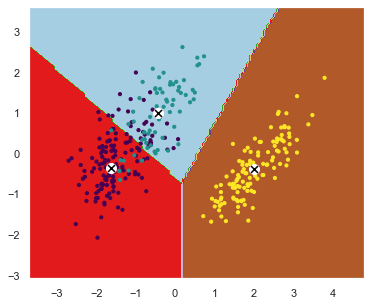

In [31]:
x_min, x_max = Y[:, 0].min() - 1, Y[:, 0].max() + 1 # find the minimum and maximum of the first feature
y_min, y_max = Y[:, 1].min() - 1, Y[:, 1].max() + 1 # find the minimum and maximum of the second feature
# create a rectangular grid which goes from the minimum to maximum values in step-size of h
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100)) 

fig = plt.figure(figsize=(6, 5)) # set up a figure of size 10 x 5
plt_decision_boundaries(kmeans,xx,yy) # plot the decision boundaries
# scatter plot of the data points coloured by their true values
plt.scatter(Y[:,0], Y[:,1], s=10, c=penguins.code, cmap='viridis') 
# get the values of the centers from the model
centers = kmeans.cluster_centers_
# plot the centre posititions with a black cross on a white circle
plt.scatter(centers[:,0], centers[:,1], c='white', s=100, alpha=1.)
plt.scatter(centers[:,0], centers[:,1], c ='black', marker='x', s=50);
#replce X INTO Y FROM EX3

### Exercise 5

Using similar calculations as for the `blobs` dataset, calculate how the inertia varies with the chosen number of clusters. (2 marks)

C:\Users\wsm\Downloads\a\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


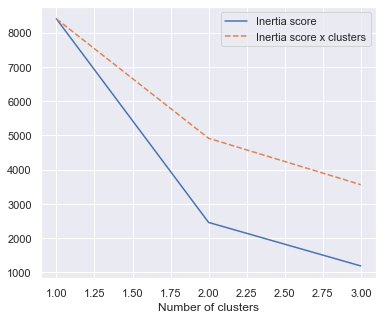

In [30]:
#INERTIA SCORE  INTRODUCE BLOBS DATASET AS NOTEBOOK8 DID.
#APPLIED 
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=.8, random_state=0)
nclusters = np.arange(1,4) # create an array of the number clusters to investigate 1,2,3 CLUSTER
inertia_score = [] # initialize an array for the inertia score
for ncl in nclusters: # loop over the number of clusters
    # instantatiate KMeans with ncl clusters
    kmeans = KMeans(n_clusters=ncl)
    kmeans.fit(X) # fit the data to the model
    # obtain the inertia score from the model and append the current value to the 
    # array inertia_score
    inertia_score.append(kmeans.inertia_) 

fig = plt.figure(figsize=(6,5)) # set up a figure of size 6 x 5
# plot the inertia score and nclusters*(inertia score)
plt.plot(nclusters,inertia_score,'-',label='Inertia score')
plt.plot(nclusters,nclusters*inertia_score,'--',label='Inertia score x clusters')
plt.legend() # put a legend in the best place
plt.xlabel('Number of clusters'); # add an x label  tHIS IS BLOB DATASET USE PENGUINS,X IS THE PENGUIN DATASET